# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [3]:
import pandas as pd
import seaborn as sns


df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Data cleaning
# Identify any null or missing data

In [4]:
df_flights[['DepDelay','DepDel15','ArrDelay','ArrDel15']].describe()


,DepDelay,DepDel15,ArrDelay,ArrDel15
count,271940.000000,269179.000000,271940.000000,271940.000000
mean,10.350449,0.201134,6.496650,0.215930
std,35.673710,0.400849,38.230331,0.411467
min,-63.000000,0.000000,-75.000000,0.000000
25%,-4.000000,0.000000,-11.000000,0.000000
50%,-1.000000,0.000000,-3.000000,0.000000
75%,9.000000,0.000000,10.000000,0.000000
max,1425.000000,1.000000,1440.000000,1.000000


In [8]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

Mark the missthing value

In [9]:
df_flights.isnull()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271936,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271937,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271938,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_with_nan = df_flights[df_flights.isnull().any(axis=1)]
df_with_nan

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


update "DepDel15" base on "DepDelay"

In [11]:
mask = df_flights['DepDelay'] >= 15
#print(df_flights[mask])
#df_flights[mask]['DepDel15'] = df_flights[mask]['DepDel15'].fillna(1)
df_flights.loc[mask, 'DepDel15'] = df_flights.loc[mask, 'DepDel15'].fillna(1)


mask = df_flights['DepDelay'] < 15
#df_flights[mask]['DepDel15'] = df_flights[mask]['DepDel15'].fillna(0)
df_flights.loc[mask, 'DepDel15'] = df_flights.loc[mask, 'DepDel15'].fillna(0)



check the NaN after updating

In [12]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

# Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.

In [13]:
from matplotlib import pyplot as plt


Rows:271940
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



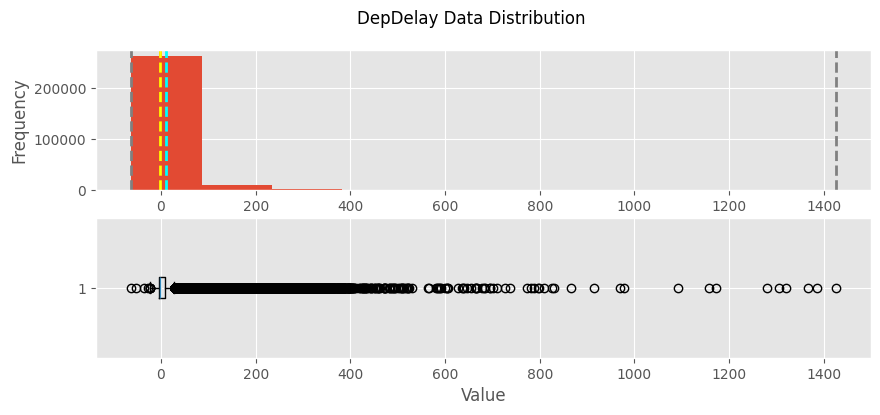

<Axes: xlabel='DepDelay', ylabel='Density'>

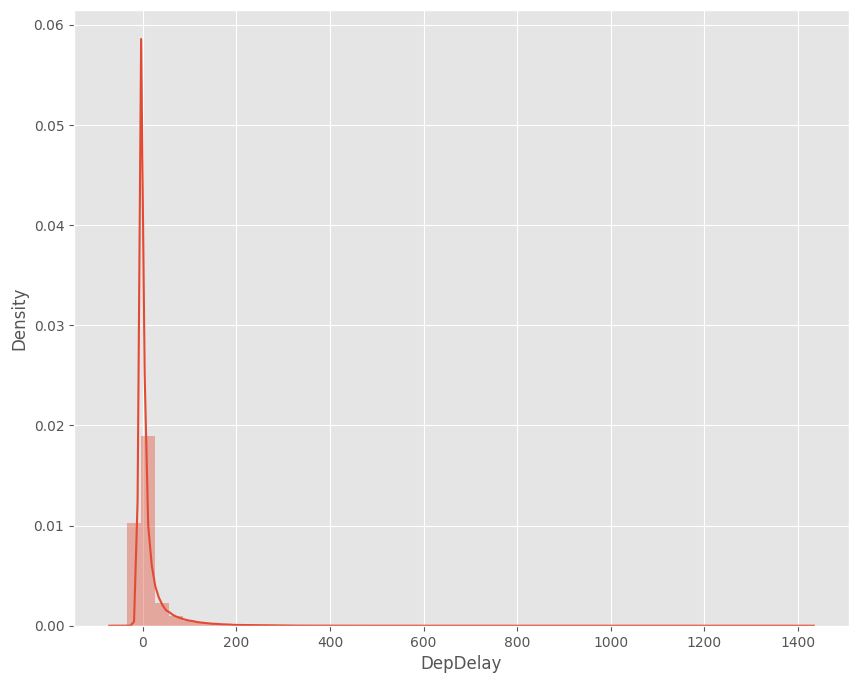

In [21]:
# Create a function that we can re-use
def show_distribution(var_data,title=""):
    # Get statistics
    count_val = var_data.count()
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Rows:{}\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(count_val,
                                                                                           max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(title + ' Data Distribution')

    # Show the figure
    plt.show()

# Get the variable to examine
col = df_flights['DepDelay']
# Call the function
show_distribution(col,title='DepDelay')


import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,8)
#plt.style.use('ggplot')
sns.distplot(col)



Rows:271940
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



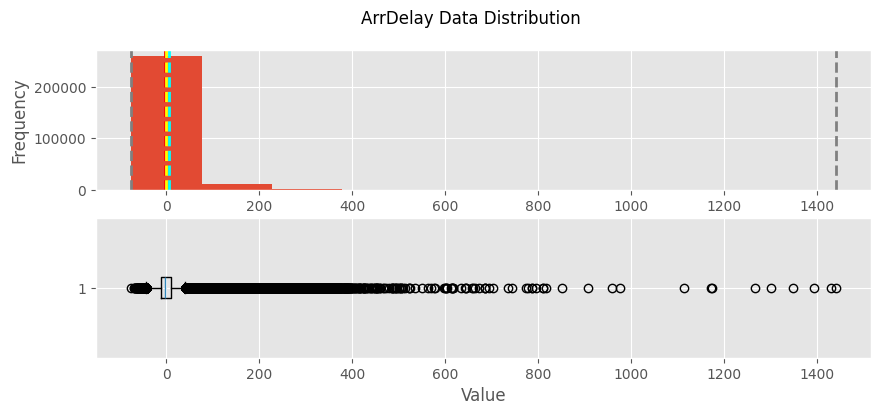

In [22]:
# Get the variable to examine
col = df_flights['ArrDelay']
# Call the function
show_distribution(col,title='ArrDelay')

# eliminate outliers

In [23]:
q1 = df_flights['ArrDelay'].quantile(0.25)
q3 = df_flights['ArrDelay'].quantile(0.75)


arr_IQR = q3 - q1

arr_left = df_flights['ArrDelay'] > q1 - arr_IQR * 1.5
arr_right = df_flights['ArrDelay'] < q3 + arr_IQR * 1.5


q1 = df_flights['DepDelay'].quantile(0.25)
q3 = df_flights['DepDelay'].quantile(0.75)

dep_IQR = q3 - q1

dep_left = df_flights['DepDelay'] > q1 - dep_IQR * 1.5
dep_right = df_flights['DepDelay'] < q3 + dep_IQR * 1.5

mask = arr_left & arr_right & dep_left & dep_right
de_flights = df_flights[mask]
de_flights


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271932,2013,8,26,1,WN,11292,Denver International,Denver,CO,12191,William P Hobby,Houston,TX,1855,-2,0.0,2215,0,0,0
271933,2013,10,29,2,US,13930,Chicago O'Hare International,Chicago,IL,14100,Philadelphia International,Philadelphia,PA,1345,-6,0.0,1645,-11,0,0
271934,2013,4,13,6,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13204,Orlando International,Orlando,FL,1335,-7,0.0,1705,-12,0,0
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0


Rows:235067
Minimum:-42.00
Mean:-4.03
Median:-5.00
Mode:0.00
Maximum:41.00



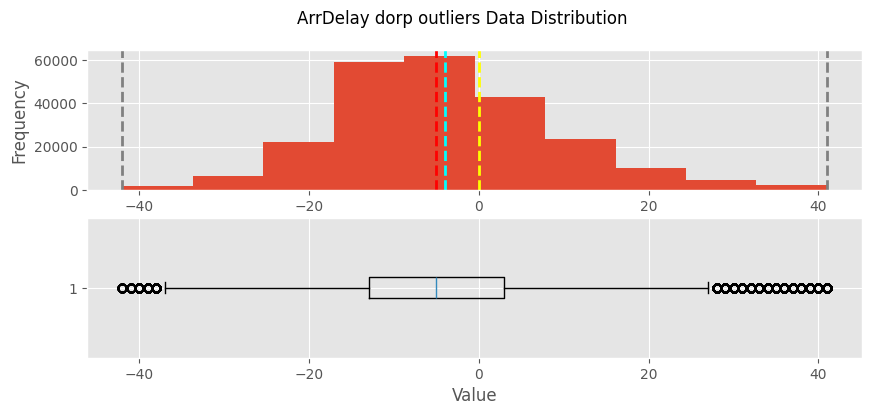

Rows:235067
Minimum:-23.00
Mean:0.37
Median:-2.00
Mode:-3.00
Maximum:28.00



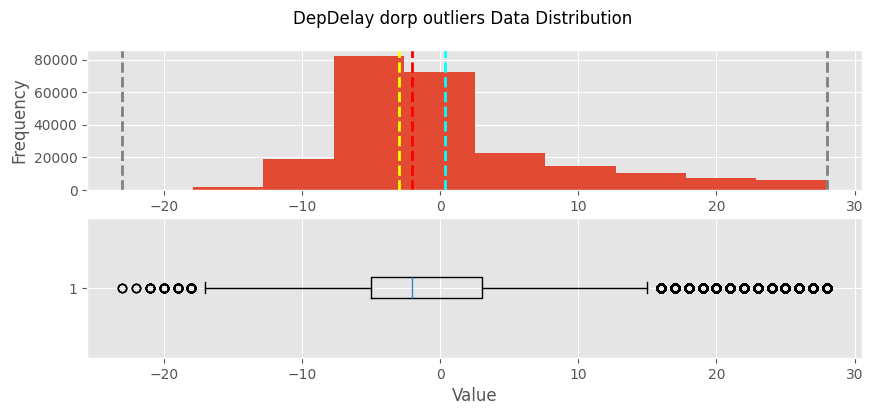

In [24]:
# Get the variable to examine
col = de_flights['ArrDelay']
# Call the function
show_distribution(col, title='ArrDelay dorp outliers')

# Get the variable to examine
col = de_flights['DepDelay']
# Call the function
show_distribution(col, title='DepDelay dorp outliers')

# View summary statistics for the numeric fields in the dataset.

In [25]:
print(df_flights[['ArrDelay','DepDelay']].describe())
print("\nafter drop outliers")
print(de_flights[['ArrDelay','DepDelay']].describe())

            ArrDelay       DepDelay
count  271940.000000  271940.000000
mean        6.496650      10.350449
std        38.230331      35.673710
min       -75.000000     -63.000000
25%       -11.000000      -4.000000
50%        -3.000000      -1.000000
75%        10.000000       9.000000
max      1440.000000    1425.000000

after drop outliers
            ArrDelay       DepDelay
count  235067.000000  235067.000000
mean       -4.029843       0.373447
std        12.959713       8.029744
min       -42.000000     -23.000000
25%       -13.000000      -5.000000
50%        -5.000000      -2.000000
75%         3.000000       3.000000
max        41.000000      28.000000


# *How do the carriers compare in terms of arrival delay performance?*

<Axes: title={'center': 'DepDelay'}, xlabel='Carrier'>

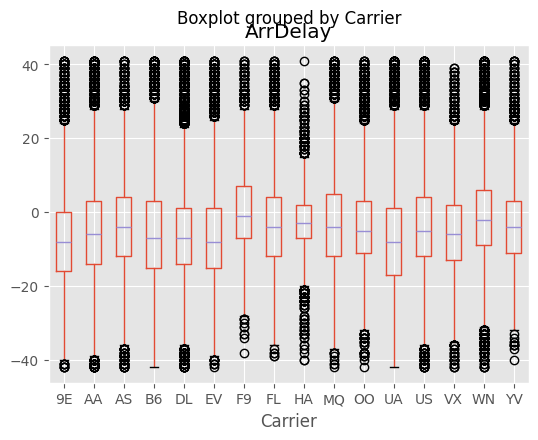

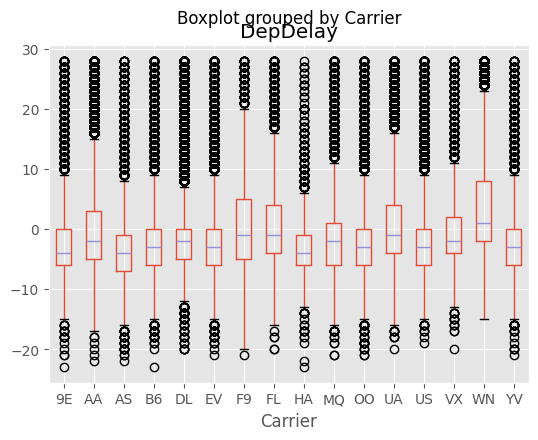

In [26]:
# Call the function
# df_flights.boxplot(column='ArrDelay', by='Carrier', figsize=(6,4.5))
# df_flights.boxplot(column='DepDelay', by='Carrier', figsize=(6,4.5))

de_flights.boxplot(column='ArrDelay', by='Carrier', figsize=(6,4.5))
de_flights.boxplot(column='DepDelay', by='Carrier', figsize=(6,4.5))

# - *Are some days of the week more prone to arrival days than others?*


<Axes: title={'center': 'DepDelay'}, xlabel='DayOfWeek'>

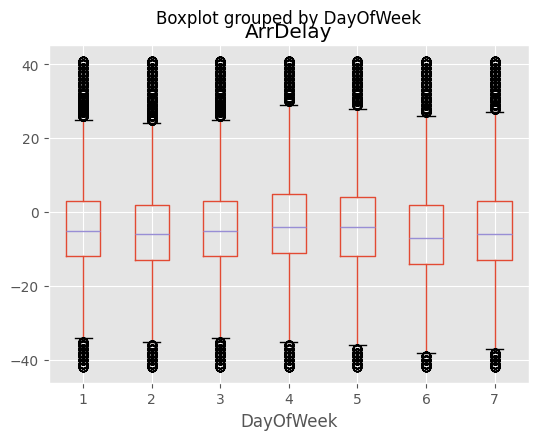

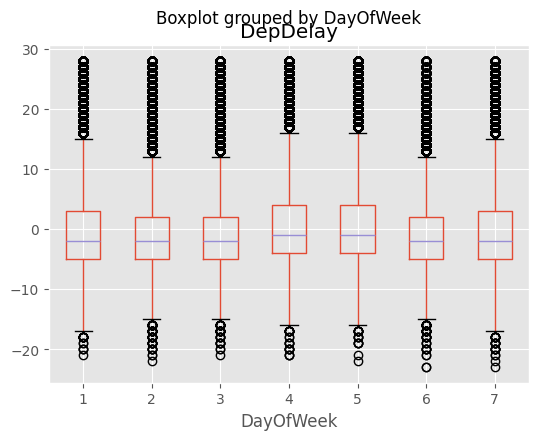

In [27]:
de_flights.boxplot(column='ArrDelay', by='DayOfWeek', figsize=(6,4.5))
de_flights.boxplot(column='DepDelay', by='DayOfWeek', figsize=(6,4.5))

# *Which departure airport has the highest average departure delay?*

                                              Airport  AvgDepDelay
0                   Albuquerque International Sunport     0.809348
1                    Austin - Bergstrom International     0.978158
2   Baltimore/Washington International Thurgood Ma...     2.630400
3                                            Bob Hope    -0.317241
4                               Bradley International    -0.594572
..                                                ...          ...
65                       Theodore Francis Green State    -1.094340
66                               Tucson International    -2.590148
67                    Washington Dulles International     0.061613
68                                  Will Rogers World    -0.838211
69                                    William P Hobby     3.726537

[70 rows x 2 columns]


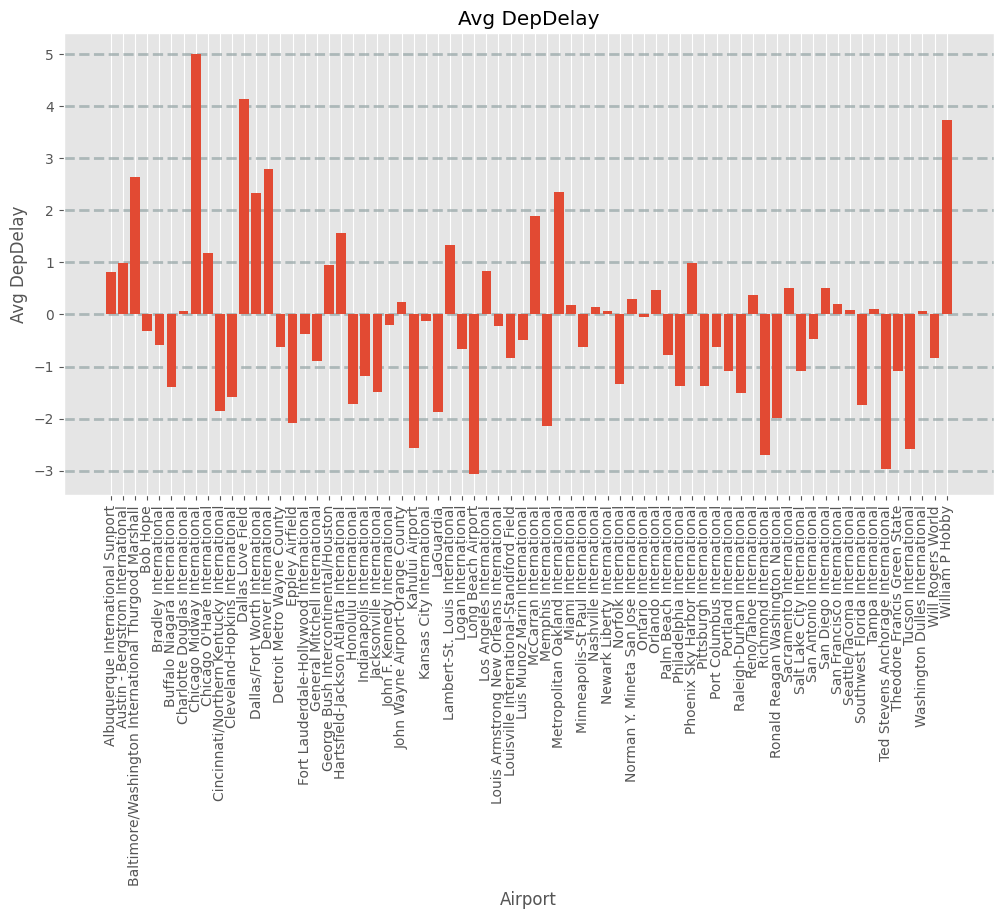

In [28]:
# Get the variable to examine
var_data = de_flights.groupby(by='OriginAirportName')['DepDelay'].mean().reset_index()
var_data.rename(columns={'OriginAirportName':'Airport',
                         'DepDelay':'AvgDepDelay'},inplace=True)
print(var_data)

fig = plt.figure(figsize=(12,6))

# Create a bar plot of name vs grade
plt.bar(x=var_data.Airport, height=var_data.AvgDepDelay)

# Customize the chart
plt.title('Avg DepDelay')
plt.xlabel('Airport')
plt.ylabel('Avg DepDelay')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()


- *Do **late** departures tend to result in longer arrival delays than on-time departures?*


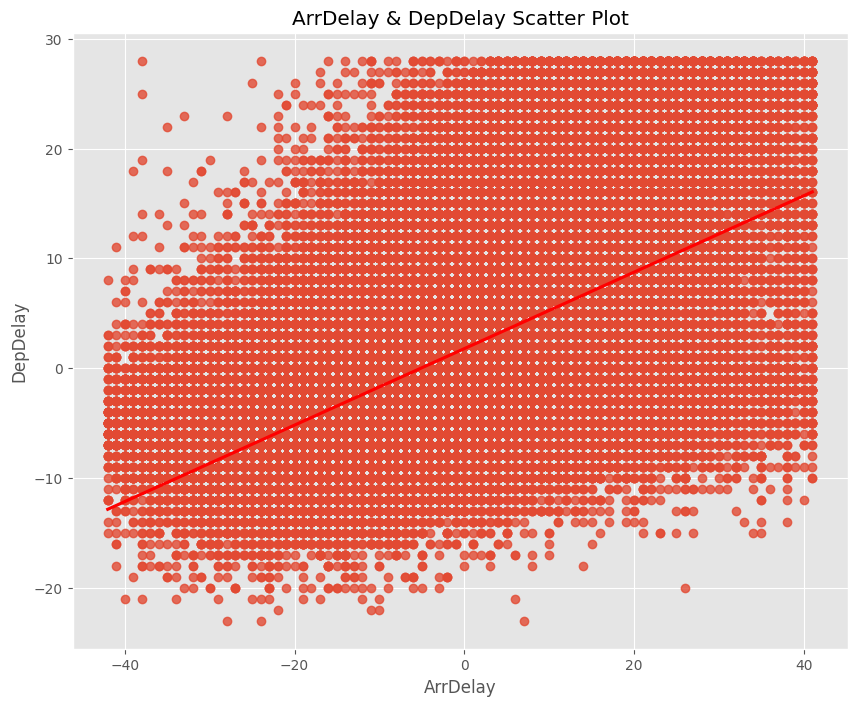

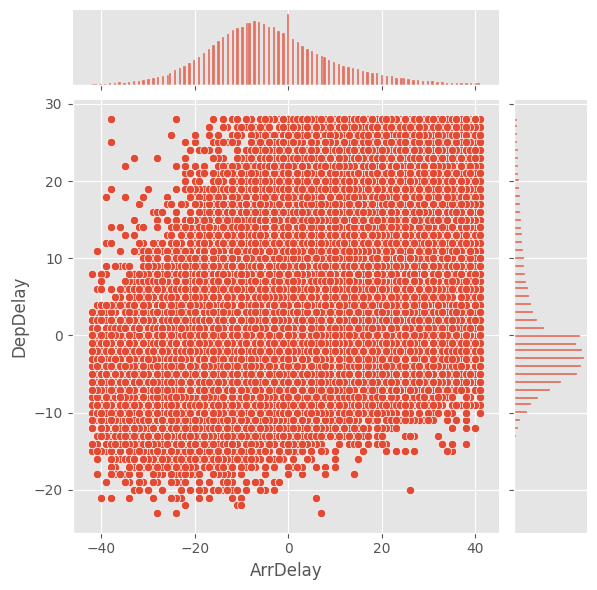

In [34]:
import seaborn as sns

# Example data
x = de_flights['ArrDelay']
y = de_flights['DepDelay']

# Create scatter plot with regression line
sns.regplot(x=x, y=y, ci=None, line_kws={"color": "red"})

# Add title
plt.title('ArrDelay & DepDelay Scatter Plot')

# Show plot
plt.show()


sns.jointplot(x='ArrDelay',y='DepDelay',data=de_flights,kind='scatter')

        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*

In [26]:
de_flights.groupby(['OriginAirportName', 'DestAirportName'])['DepDel15'].sum().sort_values(ascending=False)


OriginAirportName                         DestAirportName                
San Francisco International               Los Angeles International          81.0
Los Angeles International                 San Francisco International        75.0
McCarran International                    Los Angeles International          64.0
Hartsfield-Jackson Atlanta International  LaGuardia                          53.0
Los Angeles International                 McCarran International             53.0
                                                                             ... 
San Francisco International               Pittsburgh International            0.0
Luis Munoz Marin International            Chicago O'Hare International        0.0
                                          Dallas/Fort Worth International     0.0
McCarran International                    Memphis International               0.0
Seattle/Tacoma International              Memphis International               0.0
Name: DepDel15, Length: 

        - *Which route has the highest average arrival delay?*

In [25]:
de_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().sort_values(ascending=False)


OriginAirportName                          DestAirportName                  
Louis Armstrong New Orleans International  Ronald Reagan Washington National    25.333333
Cleveland-Hopkins International            Palm Beach International             18.000000
Denver International                       Raleigh-Durham International         13.250000
Indianapolis International                 Philadelphia International           10.000000
Palm Beach International                   Pittsburgh International             10.000000
                                                                                  ...    
Cleveland-Hopkins International            Will Rogers World                   -21.875000
Eppley Airfield                            LaGuardia                           -22.200000
Jacksonville International                 Chicago Midway International        -22.727273
Denver International                       Kahului Airport                     -25.500000
Indianapolis Internatio